In [59]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [60]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [61]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1aa3ac7134303a6411e4148a252e82ff


In [62]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [63]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [64]:
# Import citipy
from citipy import citipy

In [65]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [66]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [67]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [68]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | cidreira
Processing Record 3 of Set 1 | nanortalik
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | bur gabo
City not found. Skipping...
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | chara
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | faanui
Processing Record 11 of Set 1 | codrington
Processing Record 12 of Set 1 | luderitz
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | dikson
Processing Record 15 of Set 1 | honiara
Processing Record 16 of Set 1 | abu road
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | zyryanka
Processing Record 19 of Set 1 | miyako
Processing Record 20 of Set 1 | ancud
Processing Record 21 of Set 1 | kalmunai
Processing Record 22 of Set 1 | hermanus
Processing Record 23 of Set 1 | le port
Processing Record 24 of Set 1 | busselton
Processing 

Processing Record 39 of Set 4 | staraya russa
Processing Record 40 of Set 4 | mozarlandia
Processing Record 41 of Set 4 | korem
Processing Record 42 of Set 4 | port elizabeth
Processing Record 43 of Set 4 | haines junction
Processing Record 44 of Set 4 | kisangani
Processing Record 45 of Set 4 | caravelas
Processing Record 46 of Set 4 | sorong
Processing Record 47 of Set 4 | norman wells
Processing Record 48 of Set 4 | bonthe
Processing Record 49 of Set 4 | valle de allende
Processing Record 50 of Set 4 | ponta do sol
Processing Record 1 of Set 5 | canita
Processing Record 2 of Set 5 | baykit
Processing Record 3 of Set 5 | mar del plata
Processing Record 4 of Set 5 | lao cai
Processing Record 5 of Set 5 | college
Processing Record 6 of Set 5 | gasa
Processing Record 7 of Set 5 | katsuura
Processing Record 8 of Set 5 | eyemouth
Processing Record 9 of Set 5 | abu kamal
Processing Record 10 of Set 5 | kungurtug
Processing Record 11 of Set 5 | maniitsoq
Processing Record 12 of Set 5 | linc

Processing Record 28 of Set 8 | necochea
Processing Record 29 of Set 8 | pont-audemer
Processing Record 30 of Set 8 | camacha
Processing Record 31 of Set 8 | bengkulu
Processing Record 32 of Set 8 | lorengau
Processing Record 33 of Set 8 | karratha
Processing Record 34 of Set 8 | jieshi
Processing Record 35 of Set 8 | union
Processing Record 36 of Set 8 | paulo ramos
Processing Record 37 of Set 8 | burla
Processing Record 38 of Set 8 | araguaina
Processing Record 39 of Set 8 | thinadhoo
Processing Record 40 of Set 8 | sinnamary
Processing Record 41 of Set 8 | port hedland
Processing Record 42 of Set 8 | besancon
Processing Record 43 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 44 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 45 of Set 8 | acajutla
Processing Record 46 of Set 8 | buala
Processing Record 47 of Set 8 | ambilobe
Processing Record 48 of Set 8 | high level
Processing Record 49 of Set 8 | roccastrada
Processing Recor

Processing Record 15 of Set 12 | abashiri
Processing Record 16 of Set 12 | camara de lobos
Processing Record 17 of Set 12 | muros
Processing Record 18 of Set 12 | bilibino
Processing Record 19 of Set 12 | serenje
Processing Record 20 of Set 12 | maridi
Processing Record 21 of Set 12 | yerbogachen
Processing Record 22 of Set 12 | nantucket
Processing Record 23 of Set 12 | nizhneudinsk
Processing Record 24 of Set 12 | longyearbyen
Processing Record 25 of Set 12 | taksimo
Processing Record 26 of Set 12 | gushikawa
Processing Record 27 of Set 12 | kabare
Processing Record 28 of Set 12 | burica
City not found. Skipping...
Processing Record 29 of Set 12 | hamilton
Processing Record 30 of Set 12 | roebourne
Processing Record 31 of Set 12 | hofn
Processing Record 32 of Set 12 | fomboni
Processing Record 33 of Set 12 | oshkosh
Processing Record 34 of Set 12 | ivybridge
Processing Record 35 of Set 12 | quelimane
Processing Record 36 of Set 12 | pegnitz
Processing Record 37 of Set 12 | najran
Pro

In [69]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,80.06,74,65,8.84,PF,2021-03-04 04:29:06
1,Cidreira,-30.1811,-50.2056,74.91,91,69,2.62,BR,2021-03-04 04:29:07
2,Nanortalik,60.1432,-45.2371,36.61,75,100,20.92,GL,2021-03-04 04:29:07
3,Lebu,-37.6167,-73.6500,59.70,84,0,16.04,CL,2021-03-04 04:29:07
4,Kodiak,57.7900,-152.4072,33.80,60,1,13.80,US,2021-03-04 04:24:48
5,Chara,56.9064,118.2631,-15.18,75,91,2.26,RU,2021-03-04 04:29:08
6,Kapaa,22.0752,-159.3190,71.60,73,75,16.11,US,2021-03-04 04:29:09
7,Barrow,71.2906,-156.7887,-18.40,69,20,5.75,US,2021-03-04 04:29:09
8,Faanui,-16.4833,-151.7500,82.83,73,100,11.41,PF,2021-03-04 04:29:09
9,Codrington,-38.2667,141.9667,62.74,71,100,14.70,AU,2021-03-04 04:29:09


In [70]:
# Adjust column order in data frame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2021-03-04 04:29:06,-9.8000,-139.0333,80.06,74,65,8.84
1,Cidreira,BR,2021-03-04 04:29:07,-30.1811,-50.2056,74.91,91,69,2.62
2,Nanortalik,GL,2021-03-04 04:29:07,60.1432,-45.2371,36.61,75,100,20.92
3,Lebu,CL,2021-03-04 04:29:07,-37.6167,-73.6500,59.70,84,0,16.04
4,Kodiak,US,2021-03-04 04:24:48,57.7900,-152.4072,33.80,60,1,13.80
5,Chara,RU,2021-03-04 04:29:08,56.9064,118.2631,-15.18,75,91,2.26
6,Kapaa,US,2021-03-04 04:29:09,22.0752,-159.3190,71.60,73,75,16.11
7,Barrow,US,2021-03-04 04:29:09,71.2906,-156.7887,-18.40,69,20,5.75
8,Faanui,PF,2021-03-04 04:29:09,-16.4833,-151.7500,82.83,73,100,11.41
9,Codrington,AU,2021-03-04 04:29:09,-38.2667,141.9667,62.74,71,100,14.70


In [71]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [72]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

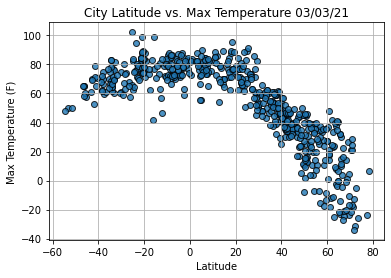

In [73]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

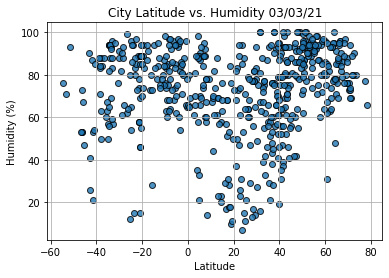

In [74]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

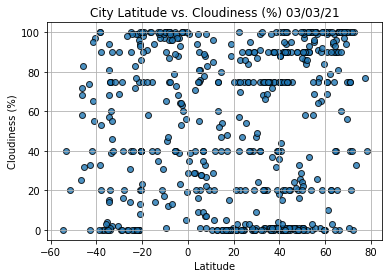

In [75]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

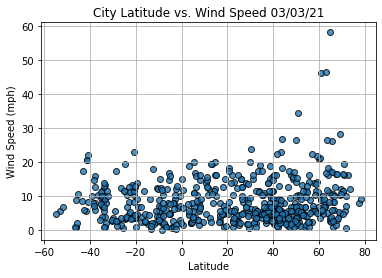

In [76]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [77]:
# Import linregress
from scipy.stats import linregress

In [78]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [79]:
index13 = city_data_df.loc[13]
index13

City                      Honiara
Country                        SB
Date          2021-03-04 04:25:05
Lat                       -9.4333
Lng                        159.95
Max Temp                     79.3
Humidity                       83
Cloudiness                    100
Wind Speed                   5.03
Name: 13, dtype: object

In [80]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Nanortalik,GL,2021-03-04 04:29:07,60.1432,-45.2371,36.61,75,100,20.92
4,Kodiak,US,2021-03-04 04:24:48,57.7900,-152.4072,33.80,60,1,13.80
5,Chara,RU,2021-03-04 04:29:08,56.9064,118.2631,-15.18,75,91,2.26
6,Kapaa,US,2021-03-04 04:29:09,22.0752,-159.3190,71.60,73,75,16.11
7,Barrow,US,2021-03-04 04:29:09,71.2906,-156.7887,-18.40,69,20,5.75


In [81]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

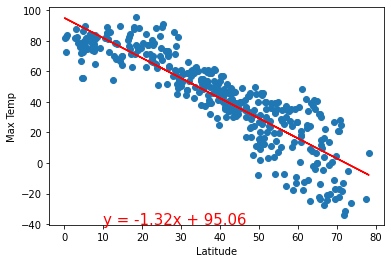

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-40))

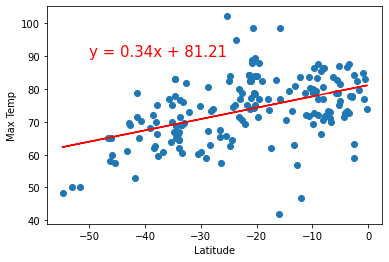

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


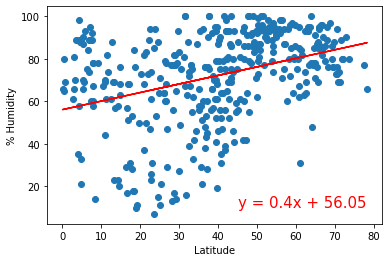

In [84]:
# Linear regression on the Northern Hemisphere (vs Humidity)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,10))

In [85]:
linregress(x_values, y_values)

LinregressResult(slope=0.4024361776218861, intercept=56.0516621009652, rvalue=0.35859025313990317, pvalue=2.4434910320180673e-13, stderr=0.053049128778382165)

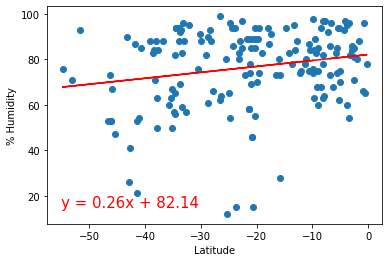

In [86]:
# Linear regression on the Southern Hemisphere (vs Humidity)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,15))

In [87]:
linregress(x_values, y_values)

LinregressResult(slope=0.26088531470983745, intercept=82.13625157302697, rvalue=0.19980292808268993, pvalue=0.008593019919758032, stderr=0.09812434297383395)

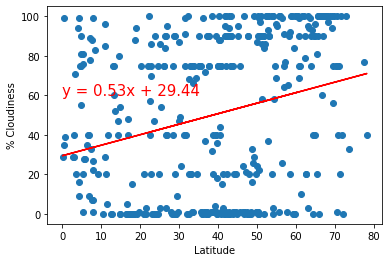

In [88]:
# Linear regression on the Northern Hemisphere (vs cloudiness)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,60))

In [89]:
linregress(x_values,y_values)

LinregressResult(slope=0.5317553571093394, intercept=29.44055567360153, rvalue=0.260973009575523, pvalue=1.5918257917270365e-07, stderr=0.09960176208358505)

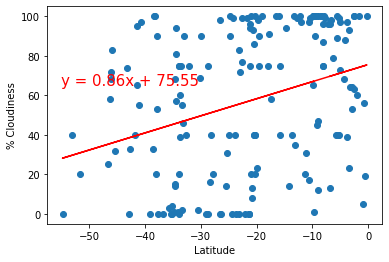

In [90]:
# Linear Regression on the southern hemisphere (vs cloudiness)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                       for % Cloudiness', '% Cloudiness', (-55, 65))

In [91]:
# lineregression values for southern hemi vs cloudiness
linregress(x_values, y_values)

LinregressResult(slope=0.864171146703126, intercept=75.55319257945415, rvalue=0.3182575514699888, pvalue=2.0939418204724998e-05, stderr=0.19742715439453623)

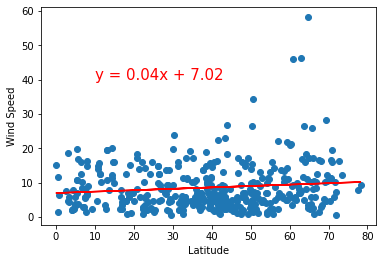

In [96]:
#Linear Regression on the north hem vs wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                       for Wind Speed', 'Wind Speed', (10, 40))

In [97]:
# regression values
linregress(x_values,y_values)

LinregressResult(slope=0.04079786902623357, intercept=7.02478376170011, rvalue=0.11494043461520985, pvalue=0.02284690223511682, stderr=0.017854365619739996)

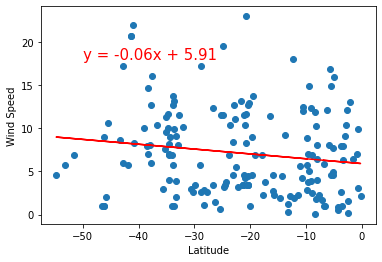

In [100]:
# Linear regression on south hemi vs wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values,y_values,
                      'Linear Regression on the Southern Hemisphere \
                       for Wind Speed', 'Wind Speed', (-50, 18))